In [33]:
!pip3 install spacy

In [34]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [35]:
doc=nlp(u"I will google about facebook")

In [36]:
doc.text

'I will google about facebook'

In [37]:
doc[0]

I

In [38]:
doc[0].pos_

'PRON'

In [39]:
doc[0].tag_

'PRP'

In [40]:
spacy.explain('PRP')

'pronoun, personal'

In [41]:
for word in doc:
    print(word.text,"=====>",word.pos_,word.tag_,spacy.explain(word.tag_))

I =====> PRON PRP pronoun, personal
will =====> AUX MD verb, modal auxiliary
google =====> VERB VB verb, base form
about =====> ADP IN conjunction, subordinating or preposition
facebook =====> NOUN NN noun, singular or mass


In [42]:
doc6=nlp(u"The quick brown fox jumps over the lazy dog")

In [43]:
from spacy import displacy
displacy.render(doc6,style='dep',jupyter=True)

In [44]:
options={
    'distance':80,
    'compact':True,
    'color':'#fff',
    'bg':'#00a65a'
}

In [45]:
displacy.render(doc6,style='dep',jupyter=True,options=options)

In [46]:
for word in doc6:
    print(word.text,"=====>",word.pos_,word.tag_,spacy.explain(word.tag_))

The =====> DET DT determiner
quick =====> ADJ JJ adjective (English), other noun-modifier (Chinese)
brown =====> ADJ JJ adjective (English), other noun-modifier (Chinese)
fox =====> NOUN NN noun, singular or mass
jumps =====> VERB VBZ verb, 3rd person singular present
over =====> ADP IN conjunction, subordinating or preposition
the =====> DET DT determiner
lazy =====> ADJ JJ adjective (English), other noun-modifier (Chinese)
dog =====> NOUN NN noun, singular or mass


In [17]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [30]:
import spacy
import nltk
from nltk.chunk import tree2conlltags
from nltk.tree import Tree
from spacy.tokens import Doc

# Load spaCy model with dependency parsing support
nlp = spacy.load("en_core_web_sm")

# Process the text
doc6 = nlp("The quick brown fox jumps over the lazy dog")

# Define the grammar for NP chunking
grammar = "NP: {<DT>?<JJ>*<NN>}"

# Create a regex parser with the grammar
cp = nltk.RegexpParser(grammar)

# Parse the entire document
result = cp.parse([(token.text, token.pos_) for token in doc6])

# Convert the NLTK parse tree to a dictionary representation
def nltk_tree_to_doc(tree):
    words = []
    for subtree in tree:
        if isinstance(subtree, nltk.Tree):
            words.append(nltk_tree_to_doc(subtree))
        else:
            words.append(subtree[0])
    return words

words = nltk_tree_to_doc(result)
spacy_doc = Doc(nlp.vocab, words=words)

# Ensure the document is parsed by the spaCy model
parsed_doc = nlp(spacy_doc)

# Visualize the parse tree using spaCy's displacy
from spacy import displacy
displacy.render(parsed_doc, style="dep", options={"compact": True, "bg": "#09a3d5", "color": "white", "font": "Source Sans Pro"})


'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="ec4eebc4e1dd4e4aab8e2179e855b586-0" class="displacy" width="1400" height="362.0" direction="ltr" style="max-width: none; height: 362.0px; color: white; background: #09a3d5; font-family: Source Sans Pro; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="272.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">The</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">DET</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="272.0">\n    <tspan class="displacy-word" fill="currentColor" x="200">quick</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="200">ADJ</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="272.0">\n    <tspan class="displacy-word" fill="currentColor" x="350">brown</tspan>\n    <tspan class="dis

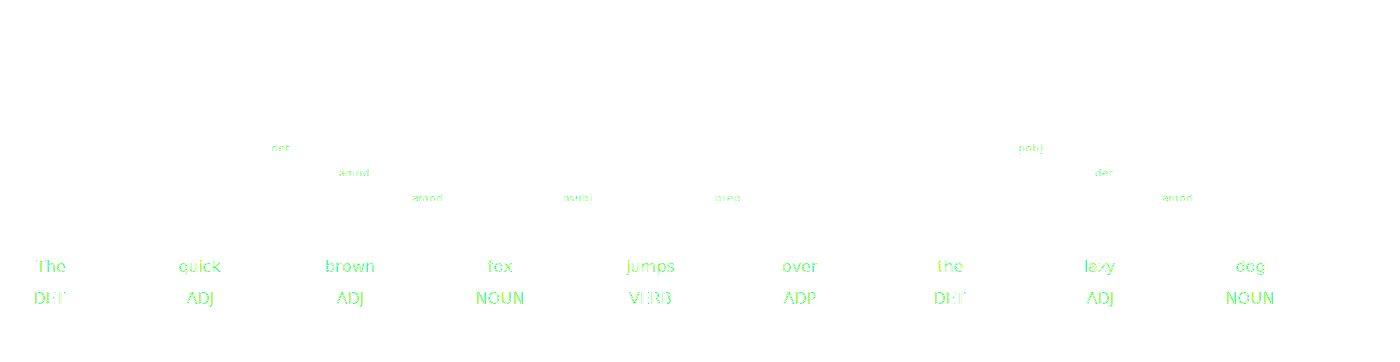

In [49]:
from IPython.display import SVG, display

# SVG code representing the parse tree
svg_code = """
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="ec4eebc4e1dd4e4aab8e2179e855b586-0" class="displacy" width="1400" height="362.0" direction="ltr" style="max-width: none; height: 362.0px; color: white; background: #09a3d5; font-family: Source Sans Pro; direction: ltr">
<text class="displacy-token" fill="currentColor" text-anchor="middle" y="272.0">
    <tspan class="displacy-word" fill="currentColor" x="50">The</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">DET</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="272.0">
    <tspan class="displacy-word" fill="currentColor" x="200">quick</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="200">ADJ</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="272.0">
    <tspan class="displacy-word" fill="currentColor" x="350">brown</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="350">ADJ</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="272.0">
    <tspan class="displacy-word" fill="currentColor" x="500">fox</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="500">NOUN</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="272.0">
    <tspan class="displacy-word" fill="currentColor" x="650">jumps</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="650">VERB</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="272.0">
    <tspan class="displacy-word" fill="currentColor" x="800">over</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="800">ADP</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="272.0">
    <tspan class="displacy-word" fill="currentColor" x="950">the</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="950">DET</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="272.0">
    <tspan class="displacy-word" fill="currentColor" x="1100">lazy</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="1100">ADJ</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="272.0">
    <tspan class="displacy-word" fill="currentColor" x="1250">dog</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="1250">NOUN</tspan>
</text>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-0" stroke-width="2px" d="M62,227.0 62,152.0 500.0,152.0 500.0,227.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-0" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">det</textPath>
    </text>
    <path class="displacy-arrowhead" d="M62,229.0 L58,221.0 66,221.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-1" stroke-width="2px" d="M212,227.0 212,177.0 497.0,177.0 497.0,227.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-1" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">amod</textPath>
    </text>
    <path class="displacy-arrowhead" d="M212,229.0 L208,221.0 216,221.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-2" stroke-width="2px" d="M362,227.0 362,202.0 494.0,202.0 494.0,227.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-2" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">amod</textPath>
    </text>
    <path class="displacy-arrowhead" d="M362,229.0 L358,221.0 366,221.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-3" stroke-width="2px" d="M512,227.0 512,202.0 644.0,202.0 644.0,227.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-3" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">nsubj</textPath>
    </text>
    <path class="displacy-arrowhead" d="M512,229.0 L508,221.0 516,221.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-4" stroke-width="2px" d="M662,227.0 662,202.0 794.0,202.0 794.0,227.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-4" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">prep</textPath>
    </text>
    <path class="displacy-arrowhead" d="M794.0,229.0 L798.0,221.0 790.0,221.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-5" stroke-width="2px" d="M962,227.0 962,177.0 1247.0,177.0 1247.0,227.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-5" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">det</textPath>
    </text>
    <path class="displacy-arrowhead" d="M962,229.0 L958,221.0 966,221.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-6" stroke-width="2px" d="M1112,227.0 1112,202.0 1244.0,202.0 1244.0,227.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-6" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">amod</textPath>
    </text>
    <path class="displacy-arrowhead" d="M1112,229.0 L1108,221.0 1116,221.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-7" stroke-width="2px" d="M812,227.0 812,152.0 1250.0,152.0 1250.0,227.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-ec4eebc4e1dd4e4aab8e2179e855b586-0-7" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">pobj</textPath>
    </text>
    <path class="displacy-arrowhead" d="M1250.0,229.0 L1254.0,221.0 1246.0,221.0" fill="currentColor"/>
</g>
</svg>"""

# Display the SVG
display(SVG(svg_code))
